## 2,4호선 데이터 정제

#### 배차시간 데이터 확인

In [133]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 

from Functions import Service 
Service.plotSetting()

___## OS platform 한글 세팅완료 ## ___


In [134]:
#### 배차시간 데이터 확인
import pandas as pd
subway_time = pd.read_csv("../Data/지하철배차시간데이터/서울교통공사_서울 도시철도 열차운행시각표_20240305.csv", encoding='euc-kr')
#서울교통공사_서울 도시철도 열차운행시각표_20240305.csv

In [177]:
subway_time.head()
subway_time=subway_time[subway_time['호선'] == 7]

In [178]:
Service.dataInfoProcessing(subway_time)


1. Data colum numbers :  13

2. null ceck 결과 총 359개의 null 이 있습니다!
   => 9번째.[열차출발시간]컬럼 :  null 359 개,	 not null 35433 개

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[고유번호(int64)]: 			35792/35792 [uniq/raw]
	1.[호선(int64)]: 			1/35792 [uniq/raw]
	2.[역사코드(float64)]: 			53/35792 [uniq/raw]
	3.[역사명(object)]: 			53/35792 [uniq/raw]
	4.[주중주말(object)]: 			2/35792 [uniq/raw]
	5.[방향(object)]: 			2/35792 [uniq/raw]
	6.[급행여부(int64)]: 			1/35792 [uniq/raw]
	7.[열차코드(object)]: 			432/35792 [uniq/raw]
	8.[열차도착시간(object)]: 		6651/35792 [uniq/raw]
	9.[열차출발시간(object)]: 		6647/35792 [uniq/raw]
	 ...etc (추가로 3개의 칼럼이 있습니다 )


In [137]:
subway_time[subway_time['호선'] == 3]
subway_time[subway_time['역사코드'] == 342.0 ]
subway_time[subway_time['방향'] == 'UP']


고유번호  호선    역사코드        역사명 주중주말  방향  급행여부   열차코드    열차도착시간  \
27913    27914   3   342.0         오금  DAY  UP     0  3024K       NaN   
27914    27915   3   342.0         오금  DAY  UP     0   3026       NaN   
27915    27916   3   342.0         오금  DAY  UP     0   3032       NaN   
27916    27917   3   342.0         오금  DAY  UP     0  3040K       NaN   
27917    27918   3   342.0         오금  DAY  UP     0   3046       NaN   
...        ...  ..     ...        ...  ...  ..   ...    ...       ...   
373619  373620   2   234.0        신도림  DAY  UP     0   5711  00:07:00   
373620  373621   8  2814.0       몽촌토성  SAT  UP     0   8030  07:44:30   
373621  373622   8  2815.0         잠실  SAT  UP     0   8026  07:25:40   
373622  373623   5  2537.0  동대문역사문화공원  SAT  UP     0   5598  15:54:40   
373623  373624   5  2537.0  동대문역사문화공원  SAT  UP     0   5128  17:48:40   

          열차출발시간    출발역  도착역  
27913   05:31:00     오금   대화  
27914   05:38:00     오금   대화  
27915   05:47:30     오금   대화  
27916   06:01:00     오금   대화  
27917   06:10:00     오금   대화  
...          ...    ...  ...  
373619       NaN    까치산  신도림  
373620  07:45:00     모란   암사  
373621  07:26:20     모란   암사  
373622  15:55:20     마천   방화  
373623  17:49:20  하남검단산   방화  

[157824 rows x 12 columns]

### 2호선 말고는 END값이 없다!

### 전체 노선 기준 상행선 157824, 하행선 159905 로 상, 하행선의 차이는 미미하다!

In [138]:
subway_time[(subway_time['역사코드'] == 150.0) & (subway_time['방향'] == 'UP')]
subway_time[(subway_time['역사코드'] == 150.0) & (subway_time['방향'] == 'DOWN')]

고유번호  호선   역사코드  역사명 주중주말    방향  급행여부  열차코드    열차도착시간    열차출발시간  \
194333  194334   1  150.0  서울역  DAY  DOWN     0   K11  05:30:00  05:30:30   
194334  194335   1  150.0  서울역  DAY  DOWN     0   K13  05:39:00  05:39:30   
194335  194336   1  150.0  서울역  DAY  DOWN     0   K17  05:58:00  05:58:30   
194336  194337   1  150.0  서울역  DAY  DOWN     0   K19  06:05:00  06:05:30   
194337  194338   1  150.0  서울역  DAY  DOWN     0   S15  05:48:30  05:49:00   
...        ...  ..    ...  ...  ...   ...   ...   ...       ...       ...   
233926  233927   1  150.0  서울역  SAT  DOWN     0  K823  23:37:30  23:38:00   
233927  233928   1  150.0  서울역  SAT  DOWN     0  K821  23:30:00  23:30:30   
233928  233929   1  150.0  서울역  SAT  DOWN     0  K827  23:52:30  23:53:00   
233929  233930   1  150.0  서울역  SAT  DOWN     0  K825  23:45:00  23:45:30   
233930  233931   1  150.0  서울역  SAT  DOWN     0  K829  00:02:00  00:02:30   

        출발역 도착역  
194333  광운대  인천  
194334   창동  인천  
194335  의정부  인천  
194336   양주  인천  
194337  동묘앞  인천  
...     ...  ..  
233926  동두천  구로  
233927   양주  구로  
233928  소요산  구로  
233929  의정부  구로  
233930   양주  구로  

[504 rows x 12 columns]

### 서울역 기준 상행선 507개, 하행선 504로 상, 하행선의 차이는 미미하다!

### 열차 출발시간, 도착시간에 NaN 값 존재!
기준을 출발로 잡아야 하나, 도착으로 잡아야 하나?


In [139]:
subway_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373624 entries, 0 to 373623
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   고유번호    373624 non-null  int64  
 1   호선      373624 non-null  int64  
 2   역사코드    373131 non-null  float64
 3   역사명     373624 non-null  object 
 4   주중주말    373624 non-null  object 
 5   방향      373624 non-null  object 
 6   급행여부    373624 non-null  int64  
 7   열차코드    373624 non-null  object 
 8   열차도착시간  357878 non-null  object 
 9   열차출발시간  349446 non-null  object 
 10  출발역     373624 non-null  object 
 11  도착역     373624 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 34.2+ MB


#### 열차 도착시간의 nonnulll값이 출발보다 크므로 도착시간 기준으로 배차간격 계산!

In [140]:
#  열차 도착시간의 NaN 값을 열차출발시간 값으로 대체
subway_time['열차도착시간'] = subway_time['열차도착시간'].fillna(subway_time['열차출발시간'])

In [141]:

subway_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373624 entries, 0 to 373623
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   고유번호    373624 non-null  int64  
 1   호선      373624 non-null  int64  
 2   역사코드    373131 non-null  float64
 3   역사명     373624 non-null  object 
 4   주중주말    373624 non-null  object 
 5   방향      373624 non-null  object 
 6   급행여부    373624 non-null  int64  
 7   열차코드    373624 non-null  object 
 8   열차도착시간  373624 non-null  object 
 9   열차출발시간  349446 non-null  object 
 10  출발역     373624 non-null  object 
 11  도착역     373624 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 34.2+ MB


##  역사코드에 Nan값이 존재


In [142]:
# '역사코드' 열에서 NaN 값만 출력
subway_time[subway_time['역사코드'].isna()]['역사명'].unique()

array(['마전', '남위례'], dtype=object)

# 역사 코드 없는 역은 남위례(8호선), 마전(인천 2호선)
-> 교통공사 데이터 확인후 남위례의 역 번호가 2828 인것을 확인, 마전은 필요없는 데이터
### 남위례의 역 번호를 2828로 대체필요!

In [143]:
# subway_time[subway_time['역사명'] == '남위례']['역사코드'] = 2828
subway_time.loc[subway_time['역사명'] == '남위례', '역사코드'] = 2828

In [144]:
subway_time[subway_time['역사명'] == '남위례']

고유번호  호선    역사코드  역사명 주중주말    방향  급행여부  열차코드    열차도착시간    열차출발시간  \
329174  329175   8  2828.0  남위례  SAT    UP     0  8122  14:00:30  14:01:00   
329175  329176   8  2828.0  남위례  SAT    UP     0  8124  14:09:00  14:09:30   
329176  329177   8  2828.0  남위례  SAT    UP     0  8126  14:17:30  14:18:00   
329177  329178   8  2828.0  남위례  SAT    UP     0  8128  14:26:00  14:26:30   
329178  329179   8  2828.0  남위례  SAT    UP     0  8130  14:34:30  14:35:00   
...        ...  ..     ...  ...  ...   ...   ...   ...       ...       ...   
331333  331334   8  2828.0  남위례  SAT  DOWN     0  8241  23:10:00  23:10:30   
331334  331335   8  2828.0  남위례  SAT  DOWN     0  8243  23:21:00  23:21:30   
331335  331336   8  2828.0  남위례  SAT  DOWN     0  8245  23:32:00  23:32:30   
331336  331337   8  2828.0  남위례  SAT  DOWN     0  8247  23:44:00  23:44:30   
331337  331338   8  2828.0  남위례  SAT  DOWN     0  8249  23:56:10  23:56:40   

       출발역 도착역  
329174  모란  암사  
329175  모란  암사  
329176  모란  암사  
329177  모란  암사  
329178  모란  암사  
...     ..  ..  
331333  암사  모란  
331334  암사  모란  
331335  암사  모란  
331336  암사  모란  
331337  암사  모란  

[249 rows x 12 columns]

### 변환한 데이터로 시간 범위 구하기

In [145]:
subway_time=subway_time[subway_time['호선'] == 7]

In [146]:
subway_time.head()

고유번호  호선    역사코드 역사명 주중주말  방향  급행여부  열차코드    열차도착시간    열차출발시간 출발역  \
111149  111150   7  3763.0  석남  DAY  UP     0  7016  05:28:00  05:28:00  석남   
111150  111151   7  3763.0  석남  DAY  UP     0  7020  05:41:30  05:41:30  석남   
111151  111152   7  3763.0  석남  DAY  UP     0  7024  05:55:30  05:55:30  석남   
111152  111153   7  3763.0  석남  DAY  UP     0  7026  06:02:30  06:02:30  석남   
111153  111154   7  3763.0  석남  DAY  UP     0  7028  06:09:30  06:09:30  석남   

        도착역  
111149  도봉산  
111150  도봉산  
111151  도봉산  
111152   장암  
111153   장암

In [147]:
subway_time['열차시간계산']=subway_time['열차도착시간'].str.split(':').str[0]

In [148]:
subway_time['주중주말'].unique()


array(['DAY', 'SAT'], dtype=object)

END: 일요일,공휴일      
DAY: 주중    
SAT: 토요일     

In [149]:
subway_time.head()

고유번호  호선    역사코드 역사명 주중주말  방향  급행여부  열차코드    열차도착시간    열차출발시간 출발역  \
111149  111150   7  3763.0  석남  DAY  UP     0  7016  05:28:00  05:28:00  석남   
111150  111151   7  3763.0  석남  DAY  UP     0  7020  05:41:30  05:41:30  석남   
111151  111152   7  3763.0  석남  DAY  UP     0  7024  05:55:30  05:55:30  석남   
111152  111153   7  3763.0  석남  DAY  UP     0  7026  06:02:30  06:02:30  석남   
111153  111154   7  3763.0  석남  DAY  UP     0  7028  06:09:30  06:09:30  석남   

        도착역 열차시간계산  
111149  도봉산     05  
111150  도봉산     05  
111151  도봉산     05  
111152   장암     06  
111153   장암     06

## 주중, 토요일 , 공유일의 배차 간격이 다르기 때문에 테이블을 3개로 분할해서 확인 필요!
-> 테이블 분할대신 주중주말 컬럼을 활용해 구분하자!

In [150]:
# 새로운 테이블 만들기
# '역사명'과 '시간'이 같은 데이터 그룹화
grouped = subway_time.groupby(['역사코드', '열차시간계산','주중주말','방향'])
# 각 그룹의 크기(개수) 계산
count = grouped.size().rename('차량수')
# 결과를 DataFrame으로 변환
interval = count.reset_index()
# 열 이름 지정
interval.columns = ['역사코드', '시간', '주중주말','방향','배차수']

interval.tail()


역사코드  시간 주중주말    방향  배차수
4128  3763.0  22  SAT    UP    5
4129  3763.0  23  DAY  DOWN    4
4130  3763.0  23  DAY    UP    4
4131  3763.0  23  SAT  DOWN    4
4132  3763.0  23  SAT    UP    4

In [151]:
interval['주중주말'].unique()

array(['DAY', 'SAT'], dtype=object)

In [152]:
# 시간에 중복값이 있는지 확인!
# print(interval_day['시간'].unique())
# print(interval_sat['시간'].unique())
# print(interval_end['시간'].unique())
# interval_sat.index
# interval_end.index
# interval_day.index
# print(interval_sat['시간'].duplicated().sum())

# print(interval_sat['시간'].dtype)
# print(interval_day['시간'].dtype)

In [153]:
# 역사코드 int로 변경
interval['역사코드'] = interval['역사코드'].astype('int64')
# interval_end['역사코드'] = interval_sat['역사코드'].astype('int64')
# interval_day['역사코드'] = interval_sat['역사코드'].astype('int64')



### 조인 시킬 데이터셋에서는 상,하행 구분이 없기 때문에 상,하행 배차수를 더해서 새로운 데이터 셋 만들기

In [154]:
interval.tail()

역사코드  시간 주중주말    방향  배차수
4128  3763  22  SAT    UP    5
4129  3763  23  DAY  DOWN    4
4130  3763  23  DAY    UP    4
4131  3763  23  SAT  DOWN    4
4132  3763  23  SAT    UP    4

In [155]:
# 역사코드(=),주중주말(=)을 기준으로 방향이 다른 배차수를 합친 후 새로운 로우 생성후 방향 컬럼 삭제한 새로운 데이터 셋 만들기
# 방향 별로 배차수 합치기
interval = interval.groupby(['역사코드', '시간', '주중주말'])['배차수'].sum().reset_index()
interval['배차수']=interval['배차수']/2
# 방향 컬럼 제거
# new_df = new_df.drop('방향', axis=1)

interval.head()

역사코드  시간 주중주말  배차수
0  2711  05  DAY  1.5
1  2711  05  SAT  1.5
2  2711  06  DAY  4.5
3  2711  06  SAT  3.5
4  2711  07  DAY  5.0

#### 서울교통공사_역별 일별 시간대별 승하차인원 정보 와 join 시키기 위해 interval 테이블 변경
 조인 시켜야 할 데이터 셋
![스크린샷 2024-06-03 오후 3.15.41.png](<attachment:스크린샷 2024-06-03 오후 3.15.41.png>)
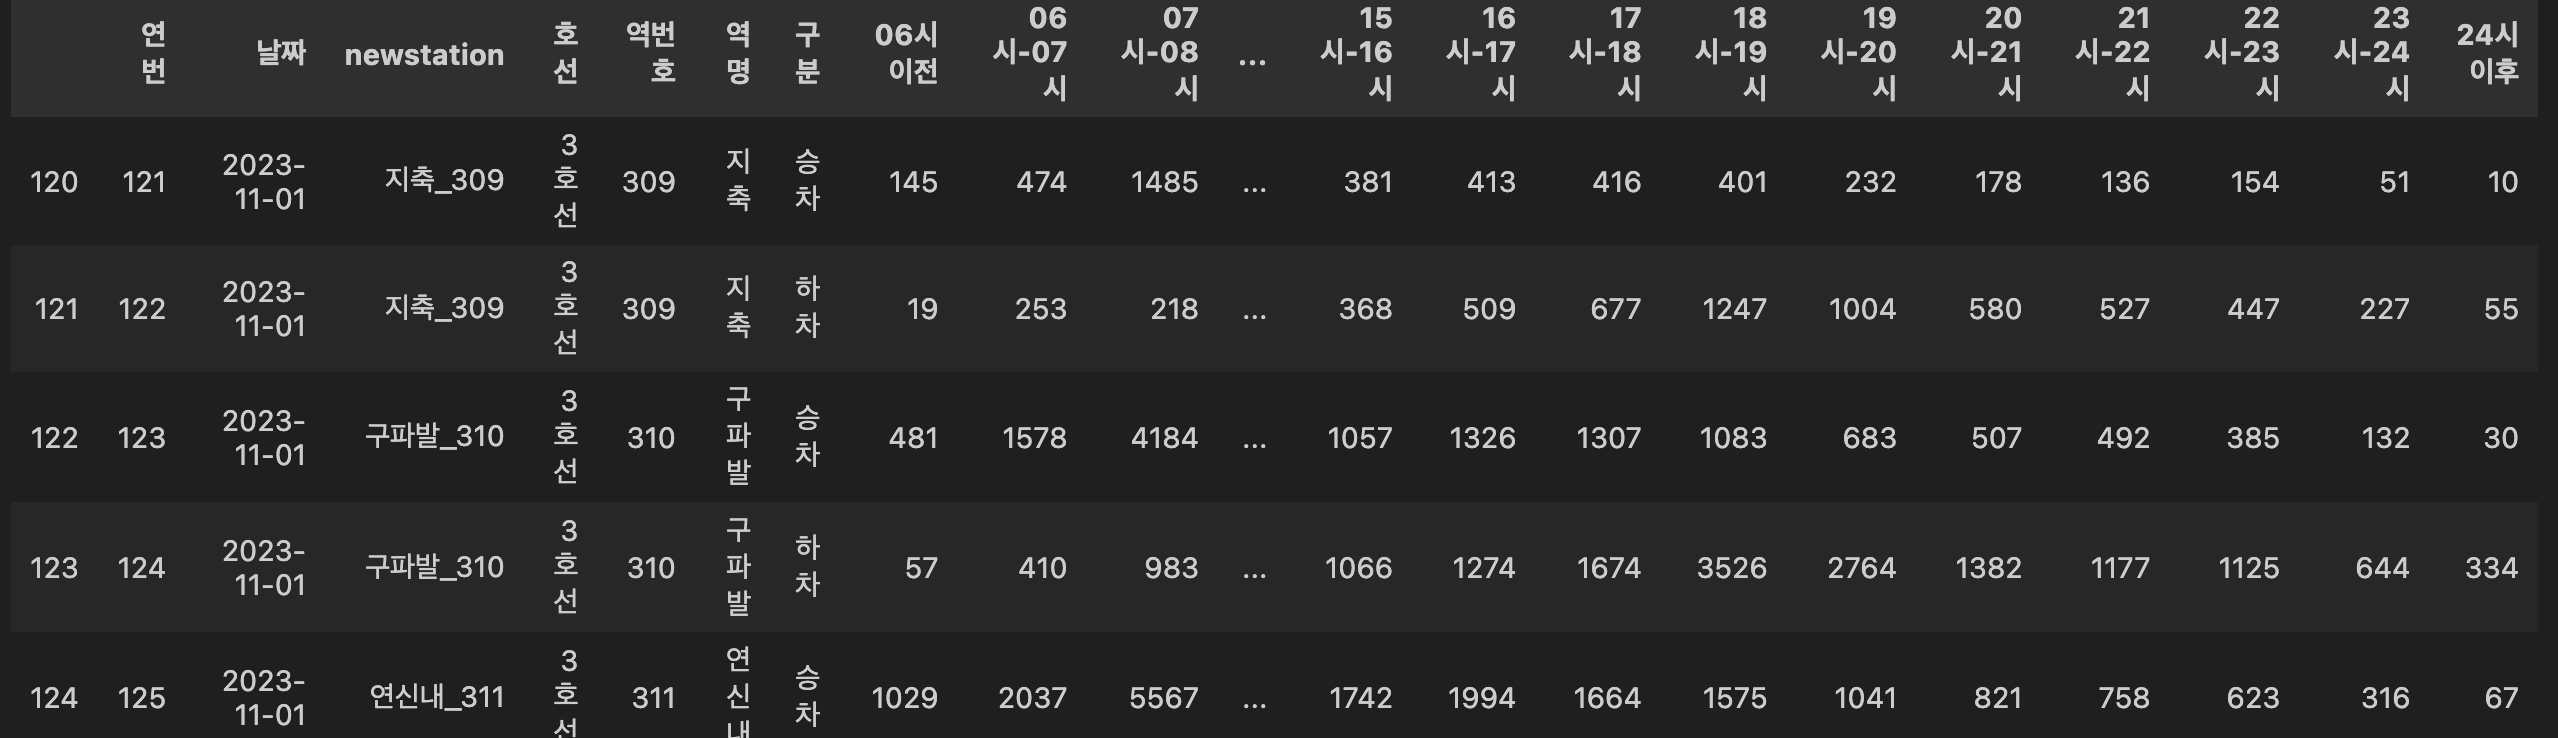

> 역 번호를 기준으로 시간 column에 배차수를 넣어서 자료를 다시 정리해야함!

In [156]:
# interval.pivot(index='역사코드', columns='시간', values='배차수')
# # interval_end.pivot(index='역사코드', columns='시간', values='배차수')
# # interval_day.pivot(index='역사코드', columns='시간', values='배차수')
# interval['역사코드'].info()
# # interval_sat
# # interval_end
# # interval_day


In [157]:
# interval=interval.pivot_table(index=['역사코드', '주중주말'], columns='시간', values='배차수', aggfunc='mean')
# # # 인덱스를 열로 리셋
# # pivot_df_reset = interval.reset_index()

# # # 인덱스를 새로 설정하여 포맷 변경
# # pivot_df_reset = pivot_df_reset.set_index(['역사코드', '주중주말'])

# interval.head()


In [158]:
# 역사코드, 주중주말
# 피벗 테이블 생성
pivot_df = interval.pivot_table(index=['역사코드', '주중주말'], columns='시간', values='배차수', aggfunc='mean')


# # 인덱스를 열로 리셋
interval = pivot_df.reset_index()

# # 첫 번째 인덱스 열을 추가하여 새로운 데이터프레임 생성
interval['역사코드2'] = interval['역사코드']
interval.drop(columns=['역사코드2'],inplace=True)

interval.index = interval['역사코드']
interval.drop(columns=['역사코드'],inplace=True)
interval.fillna(0, inplace=True)
interval


시간   주중주말   00   05   06    07    08    09    10    11    12  ...    14    15  \
역사코드                                                          ...               
2711  DAY  0.0  1.5  4.5   5.0   6.0   5.5   5.0   5.0   5.0  ...   5.0   5.0   
2711  SAT  0.0  1.5  3.5   3.5   3.5   3.0   4.0   4.5   4.0  ...   3.5   3.0   
2712  DAY  1.0  2.5  7.5  14.0  15.5  14.5  12.0  10.0  10.0  ...  10.0  10.0   
2712  SAT  1.0  2.5  6.5   9.0   9.5  10.0  10.0  10.0  10.0  ...  10.0  10.0   
2713  DAY  0.5  3.0  7.5  13.5  15.5  15.5  12.0  10.0  10.0  ...  10.0  10.0   
...   ...  ...  ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
2761  SAT  0.5  2.0  5.5   5.5   5.0   5.0   5.0   5.0   5.0  ...   5.0   5.0   
3762  DAY  0.5  2.5  6.0   8.0  10.0   8.0   6.0   5.0   5.0  ...   5.0   5.0   
3762  SAT  0.5  2.0  5.5   5.5   5.0   5.0   5.0   5.0   5.0  ...   5.0   5.0   
3763  DAY  0.5  2.5  5.5   8.5   9.5   9.0   6.0   5.0   5.0  ...   5.0   5.0   
3763  SAT  0.5  2.0  5.5   5.5   5.0   5.0   5.0   5.0   5.0  ...   5.0   5.0   

시간      16    17    18    19    20    21   22   23  
역사코드                                                
2711   4.5   4.5   6.0   5.0   4.5   4.0  2.0  3.0  
2711   3.5   4.0   4.5   3.5   3.5   4.0  3.5  3.5  
2712  10.0  12.5  14.5  13.0  12.0  10.0  8.0  6.0  
2712  10.0  10.0  10.0  10.0  10.0   9.0  8.0  5.0  
2713  10.0  12.0  14.0  14.0  12.0   9.0  8.5  6.5  
...    ...   ...   ...   ...   ...   ...  ...  ...  
2761   5.0   5.0   5.0   5.0   4.5   6.0  5.5  4.5  
3762   5.5   5.0   8.5   7.5   5.5   5.0  4.0  4.5  
3762   5.0   5.0   5.0   5.0   5.0   5.5  5.5  4.5  
3763   5.0   5.0   8.5   7.5   5.5   5.0  4.5  4.0  
3763   5.0   5.0   5.0   5.0   5.0   6.0  5.5  4.0  

[106 rows x 21 columns]

In [159]:
# 00시 컬럼을 24로 변경후 맨 뒤 컬럼으로 위치 재배치
cols = interval.columns.tolist()
cols.append(cols.pop(cols.index('00')))
interval = interval[cols]

interval.rename(columns={'00': '24'}, inplace=True)
interval.head()

시간   주중주말   05   06    07    08    09    10    11    12    13  ...    15  \
역사코드                                                           ...         
2711  DAY  1.5  4.5   5.0   6.0   5.5   5.0   5.0   5.0   5.0  ...   5.0   
2711  SAT  1.5  3.5   3.5   3.5   3.0   4.0   4.5   4.0   4.0  ...   3.0   
2712  DAY  2.5  7.5  14.0  15.5  14.5  12.0  10.0  10.0  10.0  ...  10.0   
2712  SAT  2.5  6.5   9.0   9.5  10.0  10.0  10.0  10.0  10.0  ...  10.0   
2713  DAY  3.0  7.5  13.5  15.5  15.5  12.0  10.0  10.0  10.0  ...  10.0   

시간      16    17    18    19    20    21   22   23   24  
역사코드                                                     
2711   4.5   4.5   6.0   5.0   4.5   4.0  2.0  3.0  0.0  
2711   3.5   4.0   4.5   3.5   3.5   4.0  3.5  3.5  0.0  
2712  10.0  12.5  14.5  13.0  12.0  10.0  8.0  6.0  1.0  
2712  10.0  10.0  10.0  10.0  10.0   9.0  8.0  5.0  1.0  
2713  10.0  12.0  14.0  14.0  12.0   9.0  8.5  6.5  0.5  

[5 rows x 21 columns]

### 데이터의 특징을 보기 위한 plot 찍기

In [160]:
interval2711 = interval[interval.index == 2711]

In [161]:
interval2711= interval2711

interval2711.head()

시간   주중주말   05   06   07   08   09   10   11   12   13  ...   15   16   17  \
역사코드                                                    ...                  
2711  DAY  1.5  4.5  5.0  6.0  5.5  5.0  5.0  5.0  5.0  ...  5.0  4.5  4.5   
2711  SAT  1.5  3.5  3.5  3.5  3.0  4.0  4.5  4.0  4.0  ...  3.0  3.5  4.0   

시간     18   19   20   21   22   23   24  
역사코드                                     
2711  6.0  5.0  4.5  4.0  2.0  3.0  0.0  
2711  4.5  3.5  3.5  4.0  3.5  3.5  0.0  

[2 rows x 21 columns]

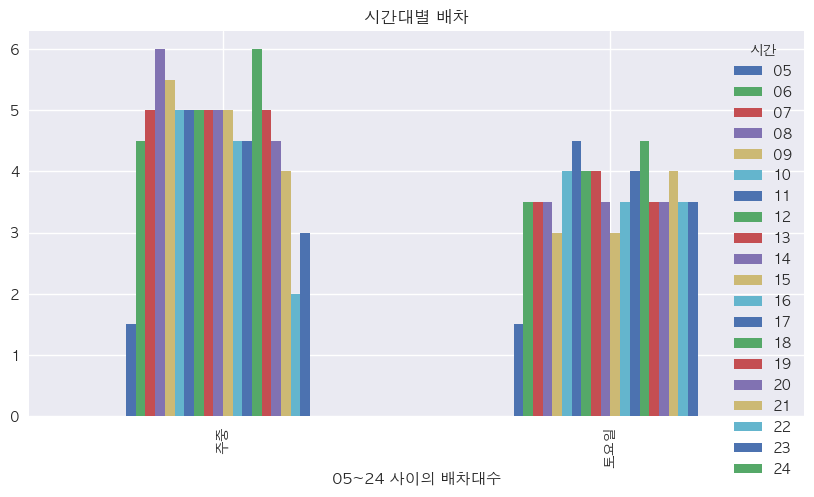

In [162]:
#내가 히스토그램을 찍고 싶은거는 무었일까...? 
#x축 시간 y 배차 대수
import matplotlib.pyplot as plt
interval2711.plot(
    kind='bar',
    # bins=20,#간격표시
    # color= '',
    figsize=(10,5)
)
plt.xticks([0, 1], ["주중", "토요일"])
plt.title('시간대별 배차')
plt.xlabel('05~24 사이의 배차대수')

plt.show()

## 원래있던 DataFrame과 합쳐야하네? 
-> 역사코드를 기준으로 column 추가      
-> 원레 데이터에서 공유일 column 추가!

In [163]:
interval.to_csv('../Data/지하철배차시간데이터/interval.csv')

In [164]:
# 서울교통공사_역별 일별 시간대별 승하차인원 정보_23.11_24.01.csv

# Data loading 
subway = pd.read_csv("../Data/교통공사데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보_23.11_24.01.csv", encoding='euc-kr')
subway.head()

연번          날짜   호선  역번호   역명  구분  06시 이전  06시-07시  07시-08시  08시-09시  ...  \
0   1  2023-11-01  1호선  150  서울역  승차     342      520     1929     2864  ...   
1   2  2023-11-01  1호선  150  서울역  하차     300     2166     5186    10500  ...   
2   3  2023-11-01  1호선  151   시청  승차      86      157      303      415  ...   
3   4  2023-11-01  1호선  151   시청  하차     220     1014     3464     9344  ...   
4   5  2023-11-01  1호선  152   종각  승차     144      167      256      454  ...   

   15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  21시-22시  22시-23시  \
0     3265     3834     6739     9519     4370     2870     2550     1641   
1     2372     2231     3041     3053     1729     1249     1114      734   
2     1973     2508     4322     7531     2677     2211     2100     1250   
3      971      973     1102     1012      556      321      264      174   
4     2364     2805     6649    10098     3847     3149     3366     2330   

   23시-24시  24시 이후  
0      753      72  
1      381     108  
2      399      31  
3      108      40  
4      908      38  

[5 rows x 26 columns]

In [165]:
subway[subway['역명'] == '남위례']

연번          날짜   호선   역번호   역명  구분  06시 이전  06시-07시  07시-08시  \
544      545  2023-11-01  8호선  2828  남위례  승차      66      289     1035   
545      546  2023-11-01  8호선  2828  남위례  하차      38      128      337   
1090    1091  2023-11-02  8호선  2828  남위례  승차      62      289      988   
1091    1092  2023-11-02  8호선  2828  남위례  하차      37      136      338   
1636    1637  2023-11-03  8호선  2828  남위례  승차      62      263      939   
...      ...         ...  ...   ...  ...  ..     ...      ...      ...   
49143  49144  2024-01-29  8호선  2828  남위례  하차      41      127      313   
49688  49689  2024-01-30  8호선  2828  남위례  승차      62      300      873   
49689  49690  2024-01-30  8호선  2828  남위례  하차      37      131      306   
50236  50237  2024-01-31  8호선  2828  남위례  승차      54      283      923   
50237  50238  2024-01-31  8호선  2828  남위례  하차      39      134      340   

       08시-09시  ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  \
544       1552  ...      311      513      667      812      288      229   
545       1259  ...      329      385      628     1125      800      411   
1090      1254  ...      337      531      679      839      325      246   
1091      1221  ...      406      442      661     1113      781      419   
1636      1137  ...      370      591      707      815      351      265   
...        ...  ...      ...      ...      ...      ...      ...      ...   
49143      921  ...      314      356      557     1136      783      394   
49688     1104  ...      330      394      605      809      317      288   
49689      954  ...      350      439      588     1022      794      421   
50236     1111  ...      379      392      613      789      338      263   
50237      932  ...      348      406      638     1048      864      376   

       21시-22시  22시-23시  23시-24시  24시 이후  
544        242      197       70      35  
545        367      340      193      71  
1090       262      226       78      26  
1091       392      383      211      76  
1636       255      185      103      47  
...        ...      ...      ...     ...  
49143      371      328      155      63  
49688      233      165       74      38  
49689      421      317      202      96  
50236      251      202      105      33  
50237      414      316      214      89  

[184 rows x 26 columns]

In [166]:
# 7 호선 정보 빼기
line_7=subway[subway['호선'] == '7호선']


In [167]:
line_7.tail()

#2023-11-01 ~ 2024-01-31 사이의 데이터

연번          날짜   호선   역번호          역명  구분  06시 이전  06시-07시  07시-08시  \
50197  50198  2024-01-31  7호선  2750       광명사거리  하차     195      446      638   
50198  50199  2024-01-31  7호선  2751          천왕  승차     321      777     2285   
50199  50200  2024-01-31  7호선  2751          천왕  하차      42      231      315   
50200  50201  2024-01-31  7호선  2752  온수(성공회대입구)  승차     337      793     1930   
50201  50202  2024-01-31  7호선  2752  온수(성공회대입구)  하차      33      128      330   

       08시-09시  ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  \
50197      922  ...     1332     1441     1900     3204     2556     1227   
50198     2654  ...      401      468      549      585      248      166   
50199      584  ...      556      774     1153     1958     1652      891   
50200     2264  ...      297      370      451      486      213      124   
50201      567  ...      380      509      831     1673     1343      660   

       21시-22시  22시-23시  23시-24시  24시 이후  
50197     1032      873      548     194  
50198      173      122       51      10  
50199      724      573      357     110  
50200      161      109       50      11  
50201      527      506      330     237  

[5 rows x 26 columns]

In [168]:
#7호선 데이터 확인
def dataInfoProcessing(line_7, replace_Nan=False):
        
    print("\n1. Data colum numbers : ",len(line_7.columns))
    #print(subway.dolumns3)
    #print(subway.info())
    null_message =f"총 {line_7.isnull().sum().sum()}개의 null 이 있습니다!" if line_7.isnull().sum().sum() else "Null 없는 clean data!"
    print("\n2. null ceck 결과",null_message)
    ### Null 이 있는 칼럼 추출
    haveNullColumn =[]
    for idx, col in enumerate(line_7.columns):
        if line_7[f"{col}"].isnull().sum():
            print(f"   => {idx}번째.[{col}]컬럼 : ",f"null {line_7[f'{col}'].isnull().sum()} 개,\t not null {line_7[f'{col}'].notnull().sum()} 개")
            ## Null data fill
    if replace_Nan : ## nan 을 0 으로 대체 
        line_7[col].fillna(value=0, inplace=True)  
    
    print("\n3. Column  Information (중복체크)")
    print( "\tidx.columName |\t\t\t\t |Colum Info(dtype)|** ")
    print( "\t","--"*len("columIdx |\t\t\t\t **|Col(dtype)|** "))
    for idx, col in enumerate(line_7.dtypes.keys()):
        if idx< 7:
            if len(f"\t{idx}.[{col}({line_7.dtypes[col]})]:")<20:
                print(f"\t{idx}.[{col}({line_7.dtypes[col]})]:",\
                    f"{len(line_7[col].unique())}/{len(line_7[col])} [uniq/raw]", sep=" \t\t\t")
            else:
                    print(f"\t{idx}.[{col}({line_7.dtypes[col]})]:",\
                    f"{len(line_7[col].unique())}/{len(line_7[col])} [uniq/raw]", sep=" \t\t")

    else: 
        print(f"\t ...etc (추가로 {len(line_7.dtypes.keys())-5}개의 칼럼이 있습니다 )")
   
              
dataInfoProcessing(subway)

# subway.info(show_counts=False)
# subway.value_counts('수송일자')






1. Data colum numbers :  26

2. null ceck 결과 Null 없는 clean data!

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[연번(int64)]: 			50238/50238 [uniq/raw]
	1.[날짜(object)]: 			92/50238 [uniq/raw]
	2.[호선(object)]: 			8/50238 [uniq/raw]
	3.[역번호(int64)]: 			278/50238 [uniq/raw]
	4.[역명(object)]: 			244/50238 [uniq/raw]
	5.[구분(object)]: 			2/50238 [uniq/raw]
	6.[06시 이전(int64)]: 			1248/50238 [uniq/raw]
	 ...etc (추가로 21개의 칼럼이 있습니다 )


### 위의 결과로 보아2023-11-01 ~ 2024-01-31 사이의 데이터 셋에는 null 값이나 특이점이 있는 데이터가 없음!

In [169]:
line_7['역명']
# line_['역명']= "구파발"

426              장암
427              장암
428             도봉산
429             도봉산
430             수락산
            ...    
50197         광명사거리
50198            천왕
50199            천왕
50200    온수(성공회대입구)
50201    온수(성공회대입구)
Name: 역명, Length: 7734, dtype: object

In [170]:
# #새로운 역명 이름 생성
# line_7['newstation'] = line_7['역명'] + "_"+line_7['역번호'].astype(str)

# line_7.head()

In [171]:
#필요 없어진 역명,역이름 컬럼삭제
# line_3 = line_3.drop(['역명', '역번호'], axis=1)
# line_4 = line_4.drop(['역명', '역번호'], axis=1)


In [172]:
# line_7.head()
# line_7.columns

#### column 순서 재배치

In [173]:
# # 현재 열 이름 리스트 가져오기
# columns = line_7.columns.tolist()

# # 20번째 열 이름
# col_to_move = columns[26]  

# # 20번째 열을 제외한 나머지 열 이름
# remaining_cols = [c for c in columns if c != col_to_move]

# # 새로운 열 순서 지정
# new_column_order = remaining_cols[:2] + [col_to_move] + remaining_cols[2:]

# # 열 순서 변경
# line_7 = line_7.reindex(columns=new_column_order)
# line_7.head()

### 날짜 -> 월,주, 요일구분(휴일인지 아닌지)

### 요일 변환하기

In [174]:
# from datetime import datetime, timedelta
# years = []
# weeks = []
# months = []

# datas = line_7['날짜']

# for data in datas :
    
#     print(data[0:4])
    
#     date_obj = pd.to_datetime(data)
#     year, week, _ = date_obj.isocalendar()
#     month = date_obj.month
    
#     print(month)
#     years.append(year)
#     weeks.append(week)
#     months.append(month)



In [175]:
# line_7_on.head()